In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
%matplotlib inline

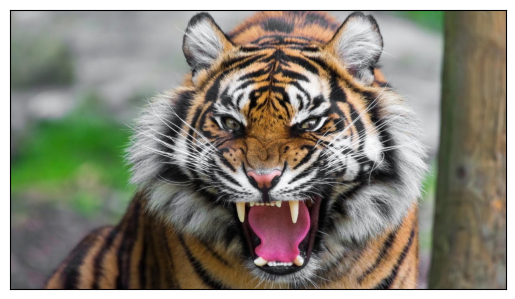

In [15]:
image = Image.open('tiger.png')
axes = plt.axes(xticks = [],yticks=[])
axes.imshow(image)

In [16]:
imarr= np.array(image)
rows = imarr.shape[0]
cols = imarr.shape[1]

In [17]:
data = imarr / 255.0
data = data.reshape(rows * cols,3)
data.shape

(921600, 3)

In [18]:
kmeans = KMeans(n_clusters=32, max_iter=300)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

c:\Users\THANH LUAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:
img_recolored = new_colors.reshape(imarr.shape)

Text(0.5, 1.0, '32-color Image')

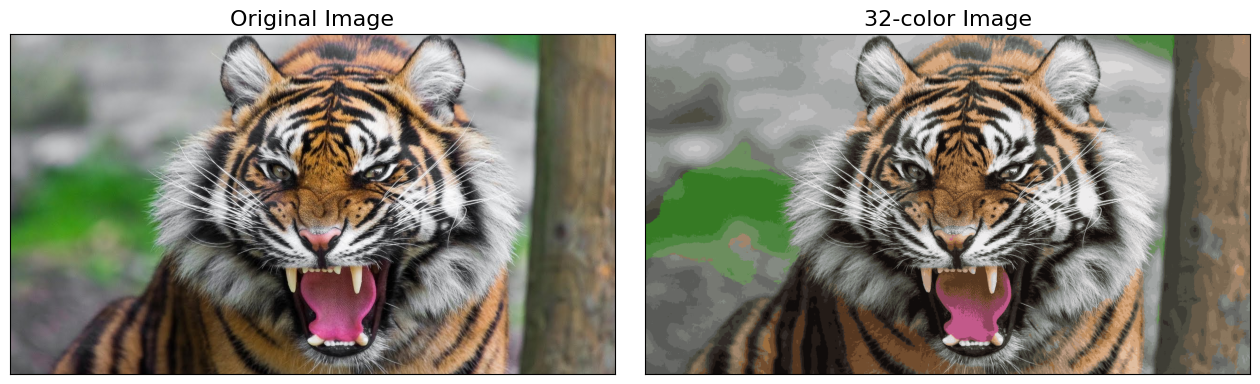

In [22]:
fig, ax = plt.subplots(1,2, figsize= (16,6), subplot_kw=dict(xticks = [], yticks = []))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(image)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(img_recolored)
ax[1].set_title('32-color Image', size=16)


In [14]:
img_recolored = img_recolored * 255
new_img = Image.fromarray(img_recolored.astype(np.uint8))
new_img.save('compressed_img3.png')